## Prepare train_data and test_data

In [1]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from hypergbm import make_experiment

07-19 17:58:34 I hypernets.u._fsutils.py 300 - use /home/wumy/tmp/workdir as working directory.


In [2]:
X,y = datasets.load_breast_cancer(as_frame=True,return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=335)
train_data = pd.concat([X_train,y_train],axis=1)

# Use cv in  HyperGBM experiment

### Input Data

,X_train.shape,y_train.shape,X_eval.shape,y_eval.shape,X_test.shape,Task
0,"(398, 30)","(398,)",None,None,None,binary(2)


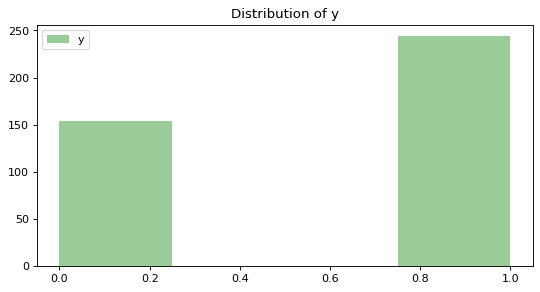

## Data Clean

### Initliazed parameters

,key,value
0,cv,True
1,data_cleaner_args,"{'nan_chars': None, 'correct_object_dtype': Tr..."
2,name,data_clean
3,random_state,8888
4,train_test_split_strategy,None


### Fitted parameters

,key,value
0,input_features,"[mean radius, mean texture, mean perimeter, me..."
1,selected_features,"[mean radius, mean texture, mean perimeter, me..."
2,unselected_features,[]
3,X_train.shape,"(398, 30)"
4,y_train.shape,"(398,)"
5,X_eval.shape,None
6,y_eval.shape,None
7,X_test.shape,None
8,unselected_reason,{}
9,kept/dropped feature count,30/0


## Space Searching

### Initliazed parameters

,key,value
0,cv,True
1,name,space_searching
2,num_folds,3


#### Trials Summary:

,Trial No.,Previous reward,Best trial,Best reward,Total elapsed,Valid trials,Max trials
0,10,0.95935,3,0.975709,12.088443,10,10


#### Top trials:

,Trial No.,Reward,Elapsed,Space Vector
0,3,0.975709,2.773491,"[2, 3, 1, 3, 2, 0, 3]"
1,9,0.975410,1.255669,"[2, 3, 1, 3, 0, 0, 4]"
2,6,0.964000,2.672014,"[2, 1, 0, 1, 2, 0]"
3,7,0.963265,0.559080,"[1, 1, 0, 3, 3, 1, 3, 2, 1, 1]"
4,5,0.963115,1.769910,"[1, 0, 1, 1, 1, 1, 3, 0, 3, 2, 2]"


#### Best Trial:

key,value
signature,697999d4a44fd6f9b39f160ab5ad2fd2
vectors,"[2, 3, 1, 3, 2, 0, 3]"
0-estimator_options.hp_or,2
1-numeric_imputer_0.strategy,most_frequent
2-numeric_scaler_optional_0.hp_opt,True
3-Module_CatBoostEstimator_1.learning_rate,0.1
4-Module_CatBoostEstimator_1.depth,7
5-Module_CatBoostEstimator_1.l2_leaf_reg,None
6-numeric_or_scaler_0.hp_or,3


### Fitted parameters

,key,value
0,input_features,"[mean radius, mean texture, mean perimeter, me..."
1,best_reward,0.96371
2,history,<hypernets.core.trial.TrialHistory object at 0...


## Final Ensemble

### Initliazed parameters

,key,value
0,ensemble_size,20
1,name,final_ensemble
2,scorer,"make_scorer(precision_score, average=binary)"


### Fitted parameters

,0,1
0,weights,"[0.45, 0.35, 0.15, 0.0, 0.05]"
1,scores,"[0.9637096774193549, 0.9670781893004116, 0.963..."
2,best_stack,"[0, 2, 0, 2, 0, 2, 1, 0, 1, 1, 0, 4, 1, 0, 0, ..."
3,hits,"{0: 9, 2: 3, 1: 7, 4: 1}"
4,ensemble_size,20


In [3]:
experiment = make_experiment(train_data.copy(), target='target', reward_metric='precision',
                             cv=True, num_folds=5)
estimator = experiment.run()

# Use searcher in HyperGBM experiment

### Input Data

,X_train.shape,y_train.shape,X_eval.shape,y_eval.shape,X_test.shape,Task
0,"(398, 30)","(398,)",None,None,None,binary(2)


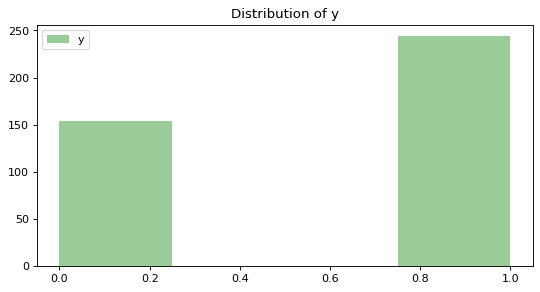

## Data Clean

### Initliazed parameters

,key,value
0,cv,True
1,data_cleaner_args,"{'nan_chars': None, 'correct_object_dtype': Tr..."
2,name,data_clean
3,random_state,8888
4,train_test_split_strategy,None


### Fitted parameters

,key,value
0,input_features,"[mean radius, mean texture, mean perimeter, me..."
1,selected_features,"[mean radius, mean texture, mean perimeter, me..."
2,unselected_features,[]
3,X_train.shape,"(398, 30)"
4,y_train.shape,"(398,)"
5,X_eval.shape,None
6,y_eval.shape,None
7,X_test.shape,None
8,unselected_reason,{}
9,kept/dropped feature count,30/0


## Space Searching

### Initliazed parameters

,key,value
0,cv,True
1,name,space_searching
2,num_folds,3


#### Trials Summary:

,Trial No.,Previous reward,Best trial,Best reward,Total elapsed,Valid trials,Max trials
0,10,0.959839,6,0.974895,17.463578,10,10


#### Top trials:

,Trial No.,Reward,Elapsed,Space Vector
0,6,0.974895,0.307903,"[1, 3, 0, 0, 2, 0, 0, 0, 1, 4]"
1,2,0.971311,0.281948,"[0, 2, 0, 0, 460, 2, 2, 1, 3]"
2,7,0.967742,1.044912,"[2, 3, 0, 3, 1, 1]"
3,9,0.967611,9.620086,"[2, 2, 1, 1, 3, 2, 3]"
4,10,0.959839,1.689704,"[2, 0, 1, 3, 2, 3, 1]"


#### Best Trial:

key,value
signature,efa0b027dff5f7cb032664969d49ae84
vectors,"[1, 3, 0, 0, 2, 0, 0, 0, 1, 4]"
0-estimator_options.hp_or,1
1-numeric_imputer_0.strategy,most_frequent
2-numeric_scaler_optional_0.hp_opt,False
3-Module_XGBoostEstimator_1.max_depth,3
4-Module_XGBoostEstimator_1.learning_rate,0.5
5-Module_XGBoostEstimator_1.booster,gbtree
6-Module_XGBoostEstimator_1.gamma,0.5
7-Module_XGBoostEstimator_1.min_child_weight,1


### Fitted parameters

,key,value
0,input_features,"[mean radius, mean texture, mean perimeter, me..."
1,best_reward,0.96371
2,history,<hypernets.core.trial.TrialHistory object at 0...


## Final Ensemble

### Initliazed parameters

,key,value
0,ensemble_size,20
1,name,final_ensemble
2,scorer,"make_scorer(precision_score, average=binary)"


### Fitted parameters

,0,1
0,weights,"[0.45, 0.35, 0.15, 0.0, 0.05]"
1,scores,"[0.9637096774193549, 0.9670781893004116, 0.963..."
2,best_stack,"[0, 2, 0, 2, 0, 2, 1, 0, 1, 1, 0, 4, 1, 0, 0, ..."
3,hits,"{0: 9, 2: 3, 1: 7, 4: 1}"
4,ensemble_size,20


In [4]:
#searcher = ['evolution', 'mcts', 'random']
experiment = make_experiment(train_data.copy(), target='target', reward_metric='precision',
                             searcher='mcts')
estimator = experiment.run()

# Use early_stopping in HyperGBM experiment

### Input Data

,X_train.shape,y_train.shape,X_eval.shape,y_eval.shape,X_test.shape,Task
0,"(398, 30)","(398,)",None,None,None,binary(2)


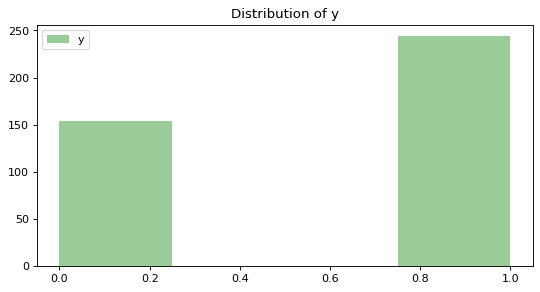

## Data Clean

### Initliazed parameters

,key,value
0,cv,True
1,data_cleaner_args,"{'nan_chars': None, 'correct_object_dtype': Tr..."
2,name,data_clean
3,random_state,8888
4,train_test_split_strategy,None


### Fitted parameters

,key,value
0,input_features,"[mean radius, mean texture, mean perimeter, me..."
1,selected_features,"[mean radius, mean texture, mean perimeter, me..."
2,unselected_features,[]
3,X_train.shape,"(398, 30)"
4,y_train.shape,"(398,)"
5,X_eval.shape,None
6,y_eval.shape,None
7,X_test.shape,None
8,unselected_reason,{}
9,kept/dropped feature count,30/0


## Space Searching

### Initliazed parameters

,key,value
0,cv,True
1,name,space_searching
2,num_folds,3


#### Trials Summary:

,Trial No.,Previous reward,Best trial,Best reward,Total elapsed,Valid trials,Max trials
0,0,0,1,0.963415,0.349202,1,10


#### Top trials:

,Trial No.,Reward,Elapsed,Space Vector
0,1,0.963415,0.325989,"[0, 2, 1, 0, 20, 1, 3, 1, 1, 3]"


### Fitted parameters

,key,value
0,input_features,"[mean radius, mean texture, mean perimeter, me..."
1,best_reward,0.96371
2,history,<hypernets.core.trial.TrialHistory object at 0...


## Final Ensemble

### Initliazed parameters

,key,value
0,ensemble_size,20
1,name,final_ensemble
2,scorer,"make_scorer(precision_score, average=binary)"


### Fitted parameters

,0,1
0,weights,"[0.45, 0.35, 0.15, 0.0, 0.05]"
1,scores,"[0.9637096774193549, 0.9670781893004116, 0.963..."
2,best_stack,"[0, 2, 0, 2, 0, 2, 1, 0, 1, 1, 0, 4, 1, 0, 0, ..."
3,hits,"{0: 9, 2: 3, 1: 7, 4: 1}"
4,ensemble_size,20


In [5]:
experiment = make_experiment(train_data.copy(), target='target', reward_metric='precision',
                             early_stopping_rounds=10,
                             early_stopping_time_limit=1800,
                             early_stopping_reward=0.96)
estimator = experiment.run()

# Use max_trials in HyperGBM experiment

### Input Data

,X_train.shape,y_train.shape,X_eval.shape,y_eval.shape,X_test.shape,Task
0,"(398, 30)","(398,)",None,None,None,binary(2)


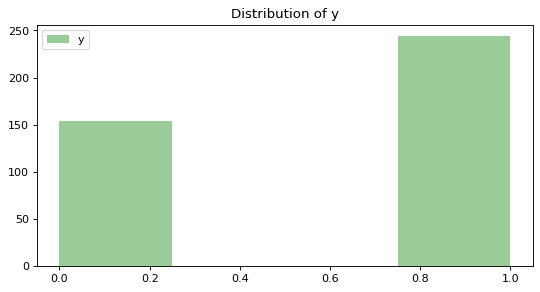

## Data Clean

### Initliazed parameters

,key,value
0,cv,True
1,data_cleaner_args,"{'nan_chars': None, 'correct_object_dtype': Tr..."
2,name,data_clean
3,random_state,8888
4,train_test_split_strategy,None


### Fitted parameters

,key,value
0,input_features,"[mean radius, mean texture, mean perimeter, me..."
1,selected_features,"[mean radius, mean texture, mean perimeter, me..."
2,unselected_features,[]
3,X_train.shape,"(398, 30)"
4,y_train.shape,"(398,)"
5,X_eval.shape,None
6,y_eval.shape,None
7,X_test.shape,None
8,unselected_reason,{}
9,kept/dropped feature count,30/0


## Space Searching

### Initliazed parameters

,key,value
0,cv,True
1,name,space_searching
2,num_folds,3


#### Trials Summary:

,Trial No.,Previous reward,Best trial,Best reward,Total elapsed,Valid trials,Max trials
0,5,0.955466,4,0.963415,4.576357,5,5


#### Top trials:

,Trial No.,Reward,Elapsed,Space Vector
0,4,0.963415,1.236660,"[0, 1, 1, 1, 220, 2, 3, 1, 1, 0]"
1,3,0.959514,1.675313,"[0, 0, 0, 1, 145, 2, 3, 0, 4]"
2,1,0.956000,0.785722,"[2, 0, 1, 1, 0, 1, 4]"
3,5,0.955466,0.513808,"[1, 0, 1, 2, 3, 0, 2, 0, 1, 3, 4]"
4,2,0.613065,0.237443,"[0, 1, 1, 2, 500, 1, 1, 5, 3, 1]"


#### Best Trial:

key,value
signature,d01fb5ad72433a5dad53a6b9bcfbb886
vectors,"[0, 1, 1, 1, 220, 2, 3, 1, 1, 0]"
0-estimator_options.hp_or,0
1-numeric_imputer_0.strategy,median
2-numeric_scaler_optional_0.hp_opt,True
3-Module_LightGBMEstimator_1.boosting_type,dart
4-Module_LightGBMEstimator_1.num_leaves,220
5-Module_LightGBMEstimator_1.max_depth,7
6-Module_LightGBMEstimator_1.learning_rate,0.1
7-Module_LightGBMEstimator_1.reg_alpha,0.01


### Fitted parameters

,key,value
0,input_features,"[mean radius, mean texture, mean perimeter, me..."
1,best_reward,0.96371
2,history,<hypernets.core.trial.TrialHistory object at 0...


## Final Ensemble

### Initliazed parameters

,key,value
0,ensemble_size,20
1,name,final_ensemble
2,scorer,"make_scorer(precision_score, average=binary)"


### Fitted parameters

,0,1
0,weights,"[0.45, 0.35, 0.15, 0.0, 0.05]"
1,scores,"[0.9637096774193549, 0.9670781893004116, 0.963..."
2,best_stack,"[0, 2, 0, 2, 0, 2, 1, 0, 1, 1, 0, 4, 1, 0, 0, ..."
3,hits,"{0: 9, 2: 3, 1: 7, 4: 1}"
4,ensemble_size,20


In [6]:
experiment = make_experiment(train_data.copy(), target='target', reward_metric='precision',
                             max_trials=5)
estimator = experiment.run()

# Use ensemble_size in HyperGBM experiment

### Input Data

,X_train.shape,y_train.shape,X_eval.shape,y_eval.shape,X_test.shape,Task
0,"(398, 30)","(398,)",None,None,None,binary(2)


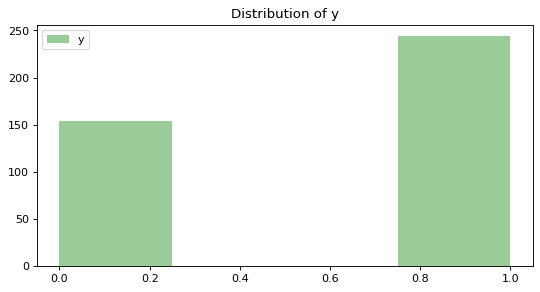

## Data Clean

### Initliazed parameters

,key,value
0,cv,True
1,data_cleaner_args,"{'nan_chars': None, 'correct_object_dtype': Tr..."
2,name,data_clean
3,random_state,8888
4,train_test_split_strategy,None


### Fitted parameters

,key,value
0,input_features,"[mean radius, mean texture, mean perimeter, me..."
1,selected_features,"[mean radius, mean texture, mean perimeter, me..."
2,unselected_features,[]
3,X_train.shape,"(398, 30)"
4,y_train.shape,"(398,)"
5,X_eval.shape,None
6,y_eval.shape,None
7,X_test.shape,None
8,unselected_reason,{}
9,kept/dropped feature count,30/0


## Space Searching

### Initliazed parameters

,key,value
0,cv,True
1,name,space_searching
2,num_folds,3


#### Trials Summary:

,Trial No.,Previous reward,Best trial,Best reward,Total elapsed,Valid trials,Max trials
0,5,0.950617,3,0.96748,3.674443,5,5


#### Top trials:

,Trial No.,Reward,Elapsed,Space Vector
0,3,0.967480,1.652957,"[2, 2, 1, 2, 2, 4, 4]"
1,2,0.955285,0.352327,"[1, 0, 0, 0, 3, 0, 4, 0, 2, 2]"
2,4,0.951613,0.693020,"[0, 0, 1, 0, 385, 3, 1, 3, 2, 4]"
3,5,0.950617,0.706575,"[1, 1, 1, 0, 1, 0, 1, 2, 4, 4, 4]"
4,1,0.613065,0.145559,"[0, 3, 0, 2, 210, 1, 1, 5, 0]"


#### Best Trial:

key,value
signature,697999d4a44fd6f9b39f160ab5ad2fd2
vectors,"[2, 2, 1, 2, 2, 4, 4]"
0-estimator_options.hp_or,2
1-numeric_imputer_0.strategy,constant
2-numeric_scaler_optional_0.hp_opt,True
3-Module_CatBoostEstimator_1.learning_rate,0.5
4-Module_CatBoostEstimator_1.depth,7
5-Module_CatBoostEstimator_1.l2_leaf_reg,30
6-numeric_or_scaler_0.hp_or,4


### Fitted parameters

,key,value
0,input_features,"[mean radius, mean texture, mean perimeter, me..."
1,best_reward,0.96371
2,history,<hypernets.core.trial.TrialHistory object at 0...


## Final Ensemble

### Initliazed parameters

,key,value
0,ensemble_size,20
1,name,final_ensemble
2,scorer,"make_scorer(precision_score, average=binary)"


### Fitted parameters

,0,1
0,weights,"[0.45, 0.35, 0.15, 0.0, 0.05]"
1,scores,"[0.9637096774193549, 0.9670781893004116, 0.963..."
2,best_stack,"[0, 2, 0, 2, 0, 2, 1, 0, 1, 1, 0, 4, 1, 0, 0, ..."
3,hits,"{0: 9, 2: 3, 1: 7, 4: 1}"
4,ensemble_size,20


In [7]:
experiment = make_experiment(train_data.copy(), target='target', reward_metric='precision',
                             max_trials=5,ensemble_size=2)
estimator = experiment.run()

# Use log_level in HyperGBM experiment

07-19 17:59:15 I hypernets.u.common.py 130 - 2 class detected, {0, 1}, so inferred as a [binary classification] task
07-19 17:59:15 I hypernets.e.compete.py 1161 - create experiment with ['data_clean', 'space_searching', 'final_ensemble']
07-19 17:59:15 I hypernets.e._maker.py 265 - make_experiment with train data:(398, 30), test data:None, eval data:None, target:target


### Input Data

,X_train.shape,y_train.shape,X_eval.shape,y_eval.shape,X_test.shape,Task
0,"(398, 30)","(398,)",None,None,None,binary(2)


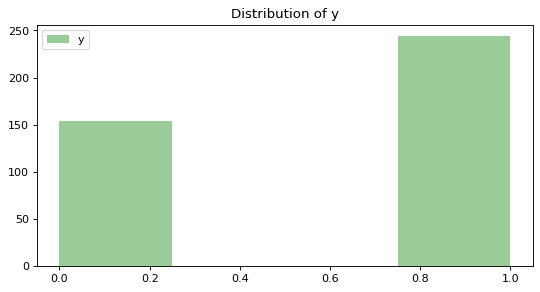

07-19 17:59:16 I hypernets.e.compete.py 1178 - fit_transform data_clean with columns: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']


## Data Clean

### Initliazed parameters

,key,value
0,cv,True
1,data_cleaner_args,"{'nan_chars': None, 'correct_object_dtype': Tr..."
2,name,data_clean
3,random_state,8888
4,train_test_split_strategy,None


07-19 17:59:16 I hypernets.e.compete.py 291 - data_clean transform train data
07-19 17:59:16 I hypernets.e.compete.py 337 - data_clean keep 30 columns


### Fitted parameters

,key,value
0,input_features,"[mean radius, mean texture, mean perimeter, me..."
1,selected_features,"[mean radius, mean texture, mean perimeter, me..."
2,unselected_features,[]
3,X_train.shape,"(398, 30)"
4,y_train.shape,"(398,)"
5,X_eval.shape,None
6,y_eval.shape,None
7,X_test.shape,None
8,unselected_reason,{}
9,kept/dropped feature count,30/0


07-19 17:59:16 I hypernets.e.compete.py 1178 - fit_transform space_searching with columns: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']


## Space Searching

### Initliazed parameters

,key,value
0,cv,True
1,name,space_searching
2,num_folds,3


07-19 17:59:16 I hypernets.c.meta_learner.py 22 - Initialize Meta Learner: dataset_id:03031507e1bb13c4ca16f1d793f4f672


#### Trials Summary:

,Trial No.,Previous reward,Best trial,Best reward,Total elapsed,Valid trials,Max trials
0,5,0.96748,5,0.96748,24.41083,5,5


#### Top trials:

,Trial No.,Reward,Elapsed,Space Vector
0,5,0.967480,1.651093,"[2, 0, 1, 2, 2, 4, 4]"
1,2,0.955823,1.643404,"[2, 3, 1, 0, 2, 0, 1]"
2,3,0.950617,19.842533,"[1, 2, 0, 1, 1, 1, 3, 2, 4, 3]"
3,1,0.948936,0.720519,"[1, 3, 1, 0, 0, 1, 2, 1, 1, 0, 4]"
4,4,0.613065,0.414300,"[0, 2, 1, 0, 250, 1, 2, 5, 2, 4]"


07-19 17:59:16 I hypergbm.hyper_gbm.py 276 - oof_scores:[{'precision': 0.9487179487179487}, {'precision': 0.961038961038961}, {'precision': 0.9375}]


#### Best Trial:

key,value
signature,697999d4a44fd6f9b39f160ab5ad2fd2
vectors,"[2, 0, 1, 2, 2, 4, 4]"
0-estimator_options.hp_or,2
1-numeric_imputer_0.strategy,mean
2-numeric_scaler_optional_0.hp_opt,True
3-Module_CatBoostEstimator_1.learning_rate,0.5
4-Module_CatBoostEstimator_1.depth,7
5-Module_CatBoostEstimator_1.l2_leaf_reg,30
6-numeric_or_scaler_0.hp_or,4


07-19 17:59:16 I hypernets.d.in_process_dispatcher.py 77 - Trial 1 done, reward: 0.948936170212766, best_trial_no:1, best_reward:0.948936170212766



07-19 17:59:18 I hypergbm.hyper_gbm.py 276 - oof_scores:[{'precision': 0.9642857142857143}, {'precision': 0.9634146341463414}, {'precision': 0.9397590361445783}]


07-19 17:59:18 I hypernets.d.in_process_dispatcher.py 77 - Trial 2 done, reward: 0.9558232931726908, best_trial_no:2, best_reward:0.9558232931726908



07-19 17:59:38 I hypergbm.hyper_gbm.py 276 - oof_scores:[{'precision': 0.9523809523809523}, {'precision': 0.9615384615384616}, {'precision': 0.9382716049382716}]


07-19 17:59:38 I hypernets.d.in_process_dispatcher.py 77 - Trial 3 done, reward: 0.9506172839506173, best_trial_no:2, best_reward:0.9558232931726908



07-19 17:59:38 I hypergbm.hyper_gbm.py 276 - oof_scores:[{'precision': 0.6165413533834586}, {'precision': 0.6090225563909775}, {'precision': 0.6136363636363636}]


07-19 17:59:38 I hypernets.d.in_process_dispatcher.py 77 - Trial 4 done, reward: 0.6130653266331658, best_trial_no:2, best_reward:0.9558232931726908



07-19 17:59:40 I hypergbm.hyper_gbm.py 276 - oof_scores:[{'precision': 0.9647058823529412}, {'precision': 0.9620253164556962}, {'precision': 0.975609756097561}]


07-19 17:59:40 I hypernets.d.in_process_dispatcher.py 77 - Trial 5 done, reward: 0.967479674796748, best_trial_no:5, best_reward:0.967479674796748

07-19 17:59:40 I hypernets.e.compete.py 728 - space_searching best_reward: 0.967479674796748


### Fitted parameters

,key,value
0,input_features,"[mean radius, mean texture, mean perimeter, me..."
1,best_reward,0.96371
2,history,<hypernets.core.trial.TrialHistory object at 0...


07-19 17:59:40 I hypernets.e.compete.py 1178 - fit_transform final_ensemble with columns: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']


## Final Ensemble

### Initliazed parameters

,key,value
0,ensemble_size,20
1,name,final_ensemble
2,scorer,"make_scorer(precision_score, average=binary)"


07-19 17:59:40 I hypernets.e.compete.py 927 - ensemble with oofs
07-19 17:59:40 I hypernets.e.compete.py 939 - ensemble info: GreedyEnsemble(weight=[0.65 0.15 0.   0.   0.2 ], scores=[0.967479674796748, 0.967741935483871, 0.967741935483871, 0.967741935483871, 0.9678714859437751, 0.967741935483871, 0.9678714859437751, 0.9678714859437751, 0.9678714859437751, 0.9678714859437751, 0.9678714859437751, 0.9678714859437751, 0.9678714859437751, 0.9678714859437751, 0.9678714859437751, 0.9678714859437751, 0.9678714859437751, 0.9678714859437751, 0.9678714859437751, 0.9678714859437751])


### Fitted parameters

,0,1
0,weights,"[0.45, 0.35, 0.15, 0.0, 0.05]"
1,scores,"[0.9637096774193549, 0.9670781893004116, 0.963..."
2,best_stack,"[0, 2, 0, 2, 0, 2, 1, 0, 1, 1, 0, 4, 1, 0, 0, ..."
3,hits,"{0: 9, 2: 3, 1: 7, 4: 1}"
4,ensemble_size,20


07-19 17:59:40 I hypernets.e.compete.py 1220 - trained experiment pipeline: ['data_clean', 'estimator']


In [8]:
#log_level = ['info','error','debug','warn'...]
experiment = make_experiment(train_data.copy(), target='target', reward_metric='precision',
                             max_trials=5,log_level='info')
estimator = experiment.run()

# Use random_state in HyperGBM experiment

### Input Data

,X_train.shape,y_train.shape,X_eval.shape,y_eval.shape,X_test.shape,Task
0,"(398, 30)","(398,)",None,None,None,binary(2)


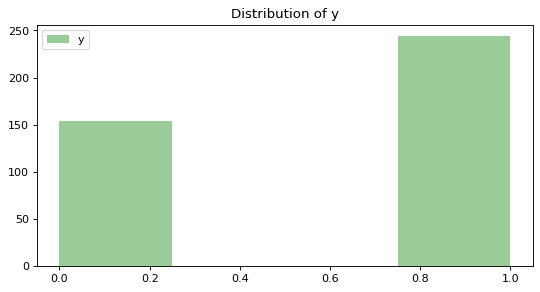

## Data Clean

### Initliazed parameters

,key,value
0,cv,True
1,data_cleaner_args,"{'nan_chars': None, 'correct_object_dtype': Tr..."
2,name,data_clean
3,random_state,8888
4,train_test_split_strategy,None


### Fitted parameters

,key,value
0,input_features,"[mean radius, mean texture, mean perimeter, me..."
1,selected_features,"[mean radius, mean texture, mean perimeter, me..."
2,unselected_features,[]
3,X_train.shape,"(398, 30)"
4,y_train.shape,"(398,)"
5,X_eval.shape,None
6,y_eval.shape,None
7,X_test.shape,None
8,unselected_reason,{}
9,kept/dropped feature count,30/0


## Space Searching

### Initliazed parameters

,key,value
0,cv,True
1,name,space_searching
2,num_folds,3


#### Trials Summary:

,Trial No.,Previous reward,Best trial,Best reward,Total elapsed,Valid trials,Max trials
0,5,0.613065,4,0.96371,3.268682,5,5


#### Top trials:

,Trial No.,Reward,Elapsed,Space Vector
0,4,0.963710,0.745797,"[2, 3, 0, 2, 0, 2]"
1,3,0.960159,0.769063,"[2, 3, 0, 3, 0, 3]"
2,1,0.954733,0.732370,"[1, 0, 0, 0, 1, 0, 1, 0, 2, 4]"
3,2,0.951417,0.702266,"[0, 1, 1, 0, 205, 2, 1, 1, 4, 2]"
4,5,0.613065,0.191781,"[0, 2, 1, 0, 250, 1, 2, 5, 4, 0]"


#### Best Trial:

key,value
signature,1eda647a850f9867b0cdd8fddfa2c686
vectors,"[2, 3, 0, 2, 0, 2]"
0-estimator_options.hp_or,2
1-numeric_imputer_0.strategy,most_frequent
2-numeric_scaler_optional_0.hp_opt,False
3-Module_CatBoostEstimator_1.learning_rate,0.5
4-Module_CatBoostEstimator_1.depth,3
5-Module_CatBoostEstimator_1.l2_leaf_reg,10


### Fitted parameters

,key,value
0,input_features,"[mean radius, mean texture, mean perimeter, me..."
1,best_reward,0.96371
2,history,<hypernets.core.trial.TrialHistory object at 0...


## Final Ensemble

### Initliazed parameters

,key,value
0,ensemble_size,20
1,name,final_ensemble
2,scorer,"make_scorer(precision_score, average=binary)"


### Fitted parameters

,0,1
0,weights,"[0.45, 0.35, 0.15, 0.0, 0.05]"
1,scores,"[0.9637096774193549, 0.9670781893004116, 0.963..."
2,best_stack,"[0, 2, 0, 2, 0, 2, 1, 0, 1, 1, 0, 4, 1, 0, 0, ..."
3,hits,"{0: 9, 2: 3, 1: 7, 4: 1}"
4,ensemble_size,20


In [9]:
experiment = make_experiment(train_data.copy(), target='target', reward_metric='precision',
                             max_trials=5, random_state=8888)
estimator = experiment.run()